## 2024년 가구수 대비 입주 예정 물량

In [10]:
import pandas as pd
import numpy as np

data=pd.read_excel('2024_plan.xlsx', index_col=0)
print(data.columns)
print(data.head())

Index(['입주예정월', '지역', '시군구', '사업유형', '주소', '주택명', '세대수'], dtype='object')
     입주예정월  지역  시군구 사업유형                      주소              주택명  세대수
연도                                                                    
2024    01  강원  홍천군   분양  강원도 홍천군 홍천읍 희망리 산 61-6    홍천 금호어울림 더퍼스트  580
2024    01  강원  춘천시   분양      강원도 춘천시 후평동 333-13  춘천후평산업단지형(행복주택)  212
2024    01  강원  강릉시   분양      강원도 강릉시 내곡동  102-0        강릉자이 파인베뉴  918
2024    02  강원  평창군   분양  강원도 평창군 대관령면 횡계리 258-1        더 리치먼드 평창  270
2024    02  강원  철원군   분양   강원도 철원군 동송읍 이평리 696-0         아데나 퍼스티어  230


In [11]:
df=pd.DataFrame(data)
df

,입주예정월,지역,시군구,사업유형,주소,주택명,세대수
연도,,,,,,,
2024,01,강원,홍천군,분양,강원도 홍천군 홍천읍 희망리 산 61-6,홍천 금호어울림 더퍼스트,580
2024,01,강원,춘천시,분양,강원도 춘천시 후평동 333-13,춘천후평산업단지형(행복주택),212
2024,01,강원,강릉시,분양,강원도 강릉시 내곡동 102-0,강릉자이 파인베뉴,918
2024,02,강원,평창군,분양,강원도 평창군 대관령면 횡계리 258-1,더 리치먼드 평창,270
2024,02,강원,철원군,분양,강원도 철원군 동송읍 이평리 696-0,아데나 퍼스티어,230
...,...,...,...,...,...,...,...
2024,08,충북,충주시,분양,"충청북도 충주시 주덕읍 화곡리 1246,1251번지",서충주삼일파라뷰그랜드센트럴(민간임대),919
2024,08,충북,진천군,임대,충청북도 진천군 덕산읍 신척리 936,진천힐데스하임레이크뷰(민간임대),679
2024,10,충북,청주시,분양,충청북도 청주시 흥덕구 오송바이오플러스지구 B4블럭,오송역파라곤센트럴시티3차(B4)민간임대,1754


In [12]:
# 지역 기준 그룹화
grouped = df.groupby('지역')
sum_2024 = grouped['세대수'].sum()
type(sum_2024), sum_2024

(pandas.core.series.Series,
 지역
 강원     10657
 경기    108913
 경남     20357
 경북     22960
 광주      9883
 대구     24221
 대전     19086
 부산     13929
 서울     28627
 세종      3360
 울산      4500
 인천     31639
 전남      9878
 전북      9910
 제주      1367
 충남     19606
 충북     13952
 Name: 세대수, dtype: int64)

In [13]:
# 순서 변경
idx=['서울','부산','대구','인천','대전','울산','경기','강원','충북','충남','전북','전남','경북','경남','제주','세종']
sum_2024=sum_2024.reindex(idx)
sum_2024=pd.DataFrame(sum_2024)
sum_2024

,세대수
지역,
서울,28627
부산,13929
대구,24221
인천,31639
대전,19086
울산,4500
경기,108913
강원,10657
충북,13952


In [14]:
# 가구수 파일
data1=pd.read_excel('가구수.xlsx', index_col=0)
data1

,2022
행정구역별(읍면동),
서울,4252134
부산,1464557
대구,1024104
인천,1249056
광주,634113
대전,656236
울산,462748
경기,5617507
강원,693576


In [15]:
# df로 변환
df1=pd.DataFrame(data1)
df1

,2022
행정구역별(읍면동),
서울,4252134
부산,1464557
대구,1024104
인천,1249056
광주,634113
대전,656236
울산,462748
경기,5617507
강원,693576


In [16]:
sum_2024['가구수']=df1['2022']
sum_2024

,세대수,가구수
지역,,
서울,28627,4252134
부산,13929,1464557
대구,24221,1024104
인천,31639,1249056
대전,19086,656236
울산,4500,462748
경기,108913,5617507
강원,10657,693576
충북,13952,724108


In [17]:
sum_2024['세대수/가구수']=sum_2024['세대수']/sum_2024['가구수']*100
sum_2024

,세대수,가구수,세대수/가구수
지역,,,
서울,28627,4252134,0.673238
부산,13929,1464557,0.951073
대구,24221,1024104,2.365092
인천,31639,1249056,2.533033
대전,19086,656236,2.908405
울산,4500,462748,0.972452
경기,108913,5617507,1.938814
강원,10657,693576,1.536530
충북,13952,724108,1.926784


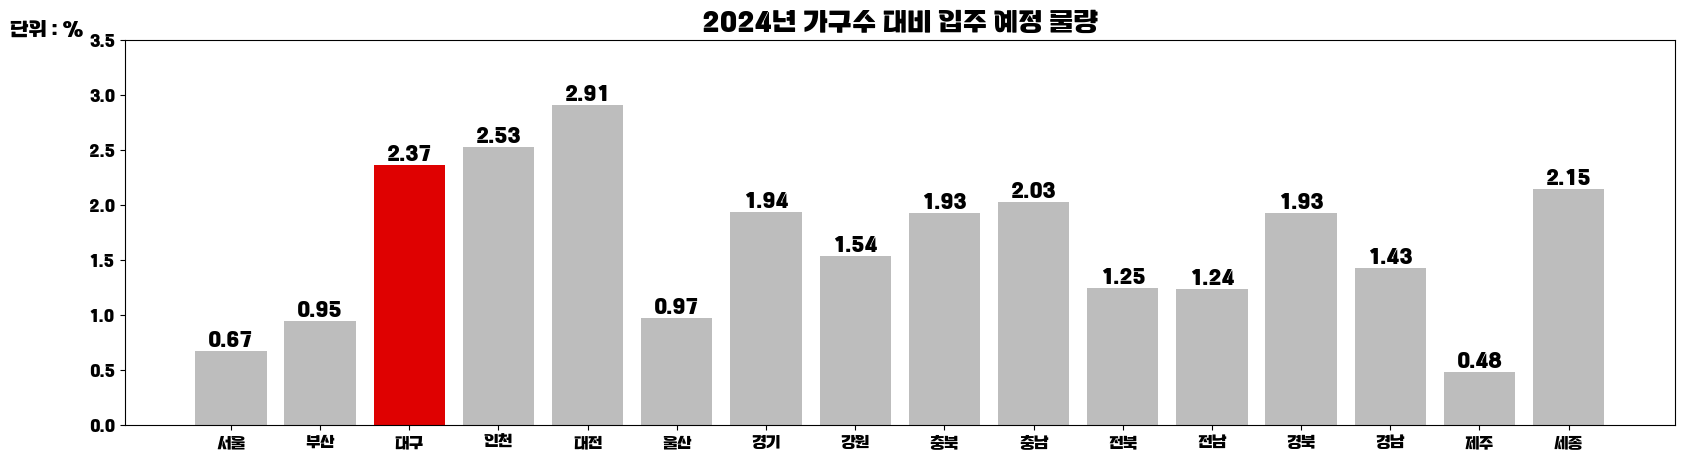

In [30]:
import matplotlib.pyplot as plt

from matplotlib import font_manager

fe = font_manager.FontEntry(
    fname=r'C:\Users\KDP-26-\AppData\Local\Microsoft\Windows\Fonts\TENADA.ttf', # ttf 파일이 저장되어 있는 경로
    name='TENADA')                        # 이 폰트의 원하는 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'TENADA'}) # 폰트 설정

plt.figure(figsize=(20,5))
a='#BDBDBD'
b='#DF0101'
color=[a,a,b,a,a,a,a,a,a,a,a,a,a,a,a]
idx=['서울','부산','대구','인천','대전','울산','경기','강원','충북','충남','전북','전남','경북','경남','제주','세종']

plt.bar(sum_2024.index,sum_2024['세대수/가구수'],color=color)
plt.xticks(rotation=0)
plt.ylim(0,3.5)
plt.ylabel('단위 : %',loc='top',rotation=0, size=15)
plt.title('2024년 가구수 대비 입주 예정 물량', size=20)

# 데이터 레이블 표시하기
for i, v in enumerate(sum_2024['세대수/가구수']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', size=15)

plt.show()